In [8]:
import scipy.io as sio

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import dask.array as da
import xarray as xr


from xmitgcm import open_mdsdataset
import xmitgcm
import ecco_v4_py as ecco


from netCDF4 import Dataset

import seawater

from analysis_package import plotting_functions
from analysis_package import open_datasets
from analysis_package import derive_potential_density_values_TEST
from analysis_package import ecco_masks

from importlib import reload

# reload modules for prototyping...
ecco_masks = reload(ecco_masks)
plotting_functions = reload(plotting_functions)
open_datasets = reload(open_datasets)
derive_potential_density_values_TEST = reload(derive_potential_density_values_TEST)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [49]:


uvel_bol_dict = {}
vvel_bol_dict = {}

for i in range(1,13):
    ufile = "./matlab_overturning/UVELbol_example_"+str(i)+".mat"
    uvel_bol_dict["UVELbol_"+str(i)] = sio.loadmat(ufile)
    vfile = "./matlab_overturning/VVELbol_example_"+str(i)+".mat"
    vvel_bol_dict["VVELbol_"+str(i)] = sio.loadmat(vfile)

In [55]:
# complete_data_dir contains ECCO state data over the entire dataset time range (1992-2016, 288 monthly mean time steps)
complete_data_dir = "./nctiles_monthly/"
# dem_dir conatins ECCO state data truncated to the first 12 monthly mean time steps
demo_dir = "./demo_nctiles_monthly/"
data_dir = complete_data_dir

#BOLUS_UVEL is the ECCO lagrangian flow velocity in the (native-grid)  x-direction
BOLUS_UVEL_var = "BOLUS_UVEL"
# BOLUS_VVEL is the ECCO lagrangian flow velocity in the (native-grid) y-direction
BOLUS_VVEL_var = "BOLUS_VVEL"

time_slice = np.arange(0,12)


grid_path = "./ecco_grid/ECCOv4r3_grid.nc"
grid = xr.open_dataset(grid_path)

BOLUS_UVEL_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, BOLUS_UVEL_var, time_slice,
                                                                rename_indices=False)
BOLUS_VVEL_raw = open_datasets.open_combine_raw_ECCO_tile_files(data_dir, BOLUS_VVEL_var, time_slice,
                                                                rename_indices=False)
# set data file indecies starting from zero.
BOLUS_UVEL_raw = BOLUS_UVEL_raw.assign_coords(i_g=np.arange(0,90),j=np.arange(0,90),k=np.arange(0,50),
                                              time=time_slice).chunk({"time":1,"i_g":90,"j":90,"k":50,"tile":13})
BOLUS_VVEL_raw = BOLUS_VVEL_raw.assign_coords(i=np.arange(0,90),j_g=np.arange(0,90),k=np.arange(0,50),
                                              time=time_slice).chunk({"time":1,"i":90,"j_g":90,"k":50,"tile":13})

Loaded BOLUS_UVEL over time slice  

Loaded BOLUS_VVEL over time slice  



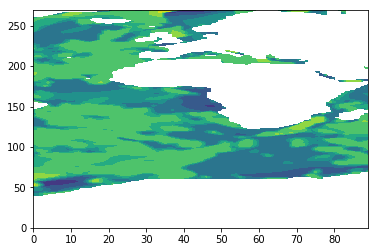

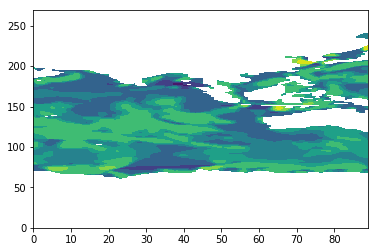

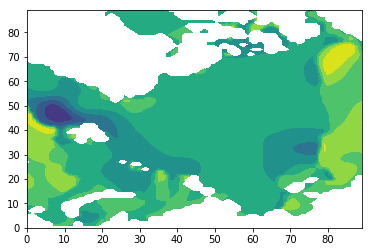

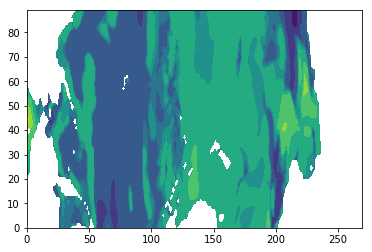

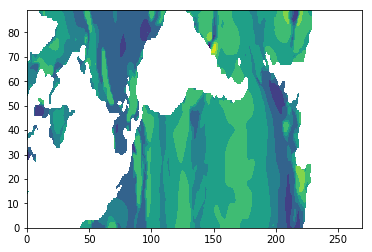

In [58]:
for i in range(2,7):
    plt.contourf(uvel_bol_dict["UVELbol_3"]["UVELbol_i"][0][0][i][:,:,0].T)
    plt.show()
    plt.close()

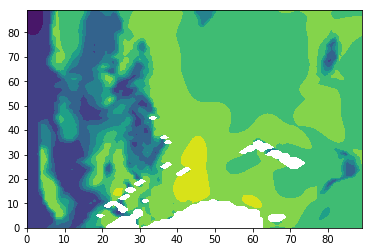

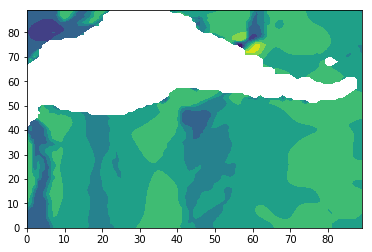

In [79]:
plt.contourf(uvel_bol_dict["UVELbol_3"]["UVELbol_i"][0][0][5][90:180,:,0].T)
plt.show()
plt.close()
plt.contourf(uvel_bol_dict["UVELbol_3"]["UVELbol_i"][0][0][6][90:180,:,0].T)
plt.show()
plt.close()

In [61]:
print(BOLUS_UVEL_raw)

<xarray.Dataset>
Dimensions:     (i_g: 90, j: 90, k: 50, tile: 13, time: 12)
Coordinates:
  * time        (time) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * k           (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j           (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g         (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
    dep         (k) float64 dask.array<shape=(50,), chunksize=(50,)>
    tim         (time) datetime64[ns] dask.array<shape=(12,), chunksize=(1,)>
  * tile        (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    bolus_uvel  (tile, time, k, j, i_g) float64 dask.array<shape=(13, 12, 50, 90, 90), chunksize=(13, 1, 50, 90, 90)>
    timstep     (tile, time) float64 dask.array<shape=(13, 12), chunksize=(13, 1)>
Attributes:
    description:    GM_PsiX -- ECCO v4 ocean state estimate, release 3 -- 199...
    A:              :Format      = native grid (nctiles w. 13 tiles)
    B:              :source     

In [82]:
tile = 0
for i in range(0,12):
    for i in range(0,50):
        k_level = i
        print((BOLUS_UVEL_raw.bolus_uvel.isel(time=time,k=k_level,tile=tile)-uvel_bol_dict["UVELbol_"+str(time+1)]["UVELbol_i"][0][0][2][:,0:90,k_level].T).sum(dim=["i_g","j"]).values)
        print((BOLUS_VVEL_raw.bolus_vvel.isel(time=time,k=k_level,tile=tile)-vvel_bol_dict["VVELbol_"+str(time+1)]["VVELbol_i"][0][0][2][:,0:90,k_level].T).sum(dim=["i","j_g"]).values)
        print((BOLUS_UVEL_raw.bolus_uvel.isel(time=time,k=k_level,tile=11)-uvel_bol_dict["UVELbol_"+str(time+1)]["UVELbol_i"][0][0][6][90:180,:,k_level].T).sum(dim=["i_g","j"]).values)
        
        #plt.contourf(BOLUS_UVEL_raw.bolus_uvel.isel(time=time,k=k_level,tile=tile)-uvel_bol_dict["UVELbol_"+str(time+1)]["UVELbol_i"][0][0][2][:,0:90,k_level].T)
        #plt.colorbar()
        #plt.show()
        #plt.close()


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
